<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/TEMP_Undistortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

fatal: destination path 'AP_Test_OPEN' already exists and is not an empty directory.


# Chess Board_Correction

(194, 259, 3)


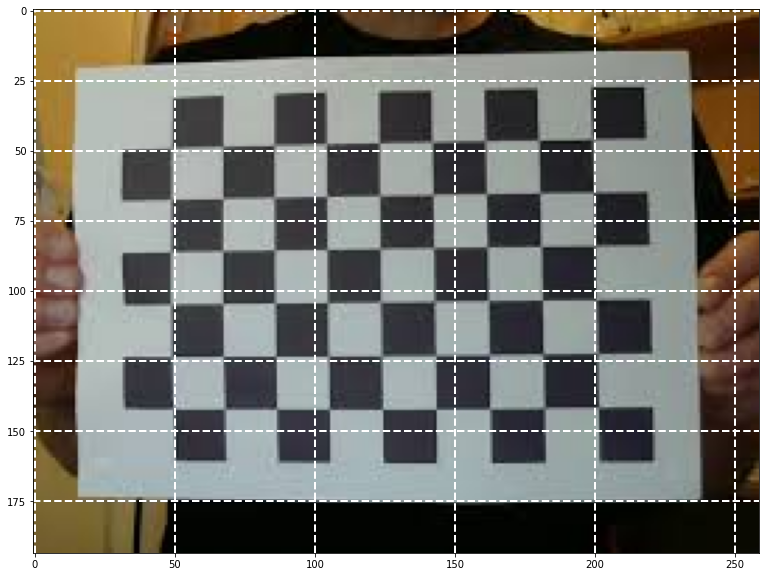

In [259]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/content/AP_Test_OPEN/ChessBoard_3.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(25, 10))
plt.imshow(image)
plt.grid(color='white', linestyle='--', linewidth=2)

print(image.shape)

True


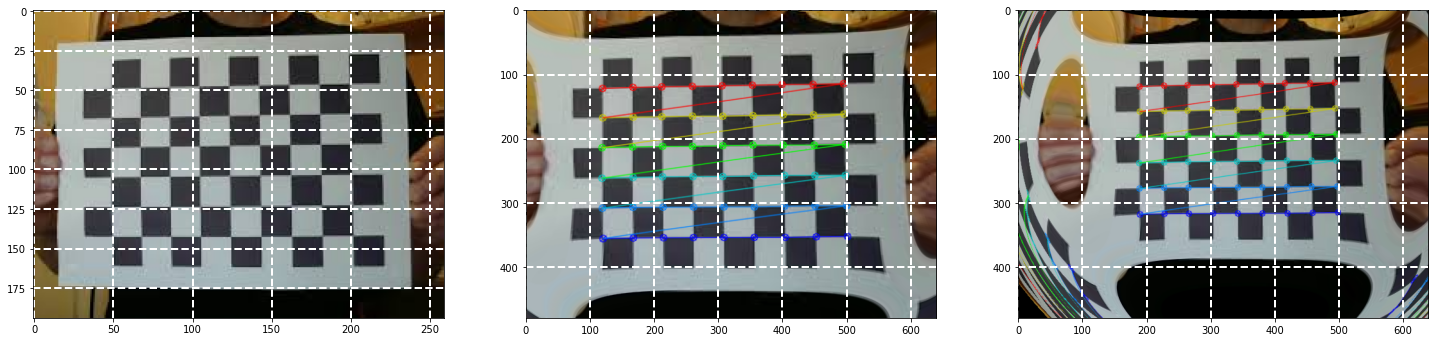

In [260]:
import numpy as np
import cv2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
wc = 9
hc = 6

objp = np.zeros((wc*hc,3), np.float32)
objp[:, :2] = np.mgrid[0:wc, 0:hc].T.reshape(-1,2)

objpoints = []
imgpoints = []

_img = cv2.resize(image, dsize = (640, 480), interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, (wc, hc), None)
print(ret)

if ret == True:
  objpoints.append(objp)
  corners2 = cv2.cornerSubPix(gray, corners, (10,10), (-1, -1), criteria)
  imgpoints.append(corners2)

  img = cv2.drawChessboardCorners(_img, (wc, hc), corners2, ret)

  ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
  h, w = img.shape[:2]
  newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 0.5)

  dst = cv2.undistort(img, mtx, dist)
  dst2= cv2.undistort(img, mtx, dist, None, newcameramtx)

  fig = plt.figure(figsize=(25, 10))
  plt.subplot(131)
  plt.imshow(image)
  plt.grid(color='white', linestyle='--', linewidth=2)
  plt.subplot(132)
  plt.imshow(dst)
  plt.grid(color='white', linestyle='--', linewidth=2)
  plt.subplot(133)
  plt.imshow(dst2)
  plt.grid(color='white', linestyle='--', linewidth=2)

(720, 1140, 3)


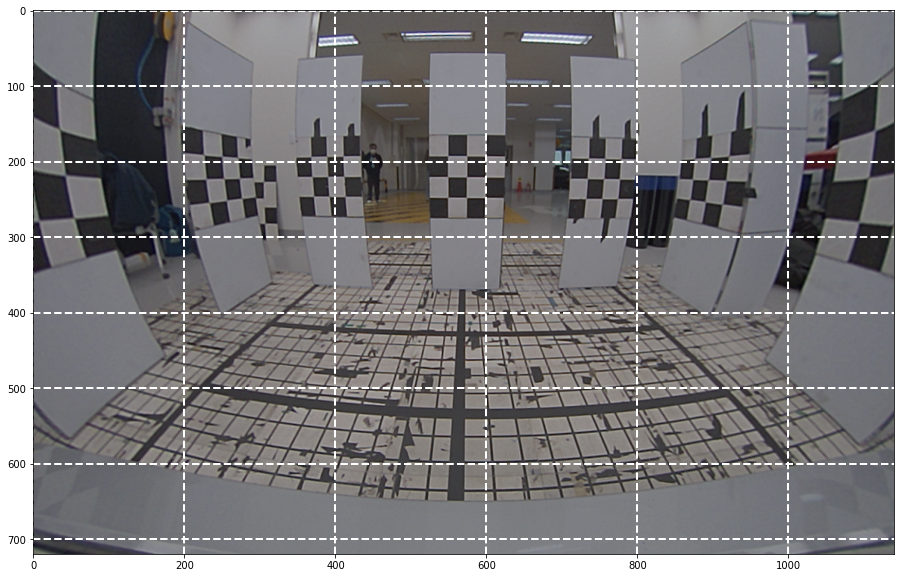

In [261]:
import cv2
import matplotlib.pyplot as plt

#img = cv2.imread('/content/AP_Test_OPEN/ViewMode_origin.bmp')
img = cv2.imread('/content/AP_Test_OPEN/ViewMode_R.bmp')
original = cv2.imread('/content/AP_Test_OPEN/ViewMode_R.bmp')
original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(25, 10))
plt.imshow(img2)
plt.grid(color='white', linestyle='--', linewidth=2)
print(img2.shape)

True


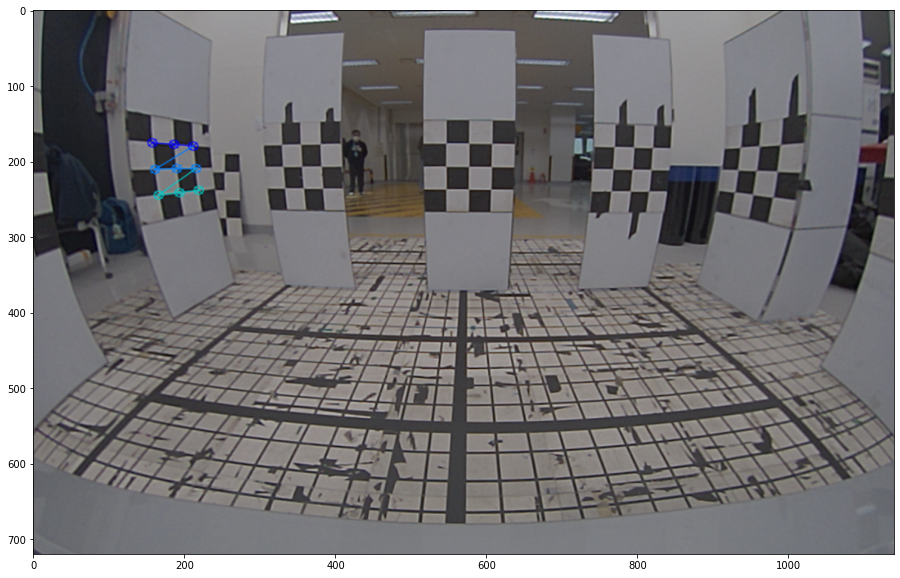

In [267]:
import numpy as np
import cv2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
wc = 3
hc = 3

objp = np.zeros((wc*hc,3), np.float32)
objp[:, :2] = np.mgrid[0:wc, 0:hc].T.reshape(-1,2)

objpoints = []
imgpoints = []

_img = cv2.resize(img2, dsize = (1140, 720), interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, (wc, hc), None)
print(ret)

if ret == True:
  objpoints.append(objp)
  corners2 = cv2.cornerSubPix(gray, corners, (10,10), (-1, -1), criteria)
  imgpoints.append(corners2)

  img = cv2.drawChessboardCorners(_img, (wc, hc), corners2, ret)

  ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
  h, w = img.shape[:2]
  newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 0.5)

  dst = cv2.undistort(img, mtx, dist)
  dst2= cv2.undistort(img, mtx, dist, None, newcameramtx)

  fig = plt.figure(figsize=(25, 10))
  #plt.subplot(131)
  #plt.imshow(img2)
  #plt.subplot(132)
  #plt.imshow(dst)
  #plt.subplot(133)
  plt.imshow(dst2)
  #plt.grid(color='white', linestyle='--', linewidth=1)
  #plt.xticks(np.arange(0, img2.shape[1], 30))
  #plt.yticks(np.arange(0, img2.shape[0], 30))

<function matplotlib.pyplot.show>

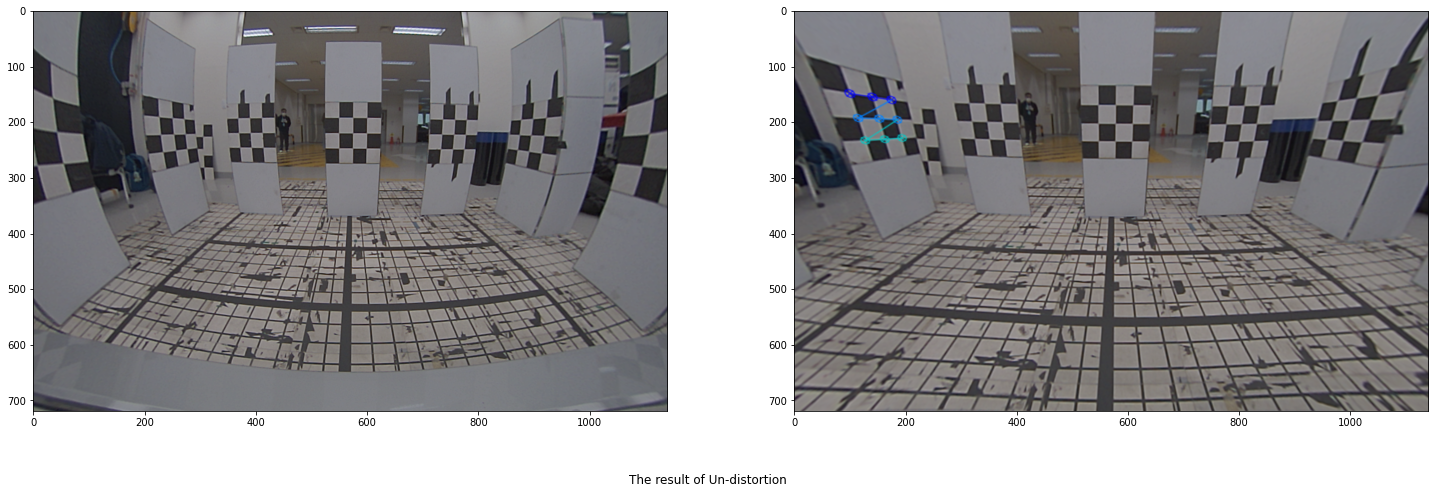

In [268]:
import cv2
import numpy as np
from skimage import io
from skimage import color
from matplotlib import pyplot as plt

# Distortion coefficient Set/up
#k1, k2, k3 = 0.5, 0.2, 0.0 # Barrel distortion
k1, k2, k3 = -0.120, -0.001, 0.0   # Pin-cushion distortion

rows, cols = dst2.shape[:2]

# Create mapping array 
mapy, mapx = np.indices((rows, cols),dtype=np.float32) 
# np.indices: Return an array representing the indices of a grid

# 1.Normalize -1 to 1 to center point coordinates
# 2.convert to polar coordinates
#mapx = 2*mapx/(cols-1)-1
mapx = 2*mapx/(cols-1)-1
mapy = 2*mapy/(rows-1)-1
r, theta = cv2.cartToPolar(mapx, mapy)

# Radiation Distortion Calculation
ru = r*(1+k1*(r**2) + k2*(r**4) + k3*(r**6)) 

# Re-storation - based on Cartesian coordinates and upper left corner
mapx, mapy = cv2.polarToCart(ru, theta)
mapx = ((mapx + 1)*cols-1)/2
mapy = ((mapy + 1)*rows-1)/2
# Re-mapping
distored = cv2.remap(dst2,mapx,mapy,cv2.INTER_LINEAR)

fig, axs = plt.subplots(1,2, figsize = (25, 15))
axs[0].imshow(original, cmap='gray')
axs[1].imshow(distored, cmap='gray')
#plt.grid(color='white', linestyle='--', linewidth=1)
#plt.xticks(np.arange(0, img2.shape[1], 30))
#plt.yticks(np.arange(0, img2.shape[0], 30))

txt= 'The result of Un-distortion'
plt.figtext(0.5, 0.25, txt, wrap=True, ha='center', fontsize=12)
plt.show